##  Author: Furkan Karabulut (fkarabu)
##  Date: 03/27/2024
## Description: 
**In this jupyternotebook, we will be exploring and analyzing datasets related to Porsche and Jaguar sports cars. The main objective is to understand whether the value of these cars is influenced by their age and mileage. We will be loading and merging datasets, performing exploratory data analysis, and creating simple and multiple regression models.**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [79]:
jaguar = pd.read_csv('jaguar.csv')
porsche = pd.read_csv('porsche.csv')

print(jaguar.head())
porsche.head()

   Unnamed: 0  Price  Age  Mileage
0           1   13.9    5     47.7
1           2   19.9    6     44.6
2           3   25.9    4     35.3
3           4   46.9    2     19.6
4           5   12.9    7     71.0


,Unnamed: 0,Price,Age,Mileage
0,1,69.4,3,21.5
1,2,56.9,3,43.0
2,3,49.9,2,19.9
3,4,47.4,4,36.0
4,5,42.9,4,44.0


/Users/furkankarabulut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


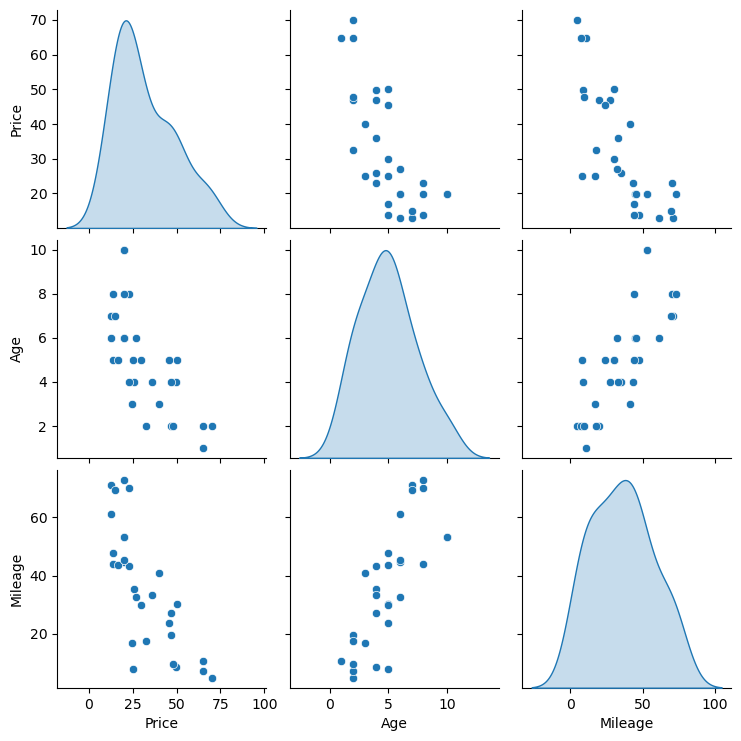

In [80]:
sns.pairplot(data=jaguar, y_vars=['Price', 'Age', 'Mileage'], x_vars=['Price', 'Age', 'Mileage'], diag_kind='kde')

/Users/furkankarabulut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


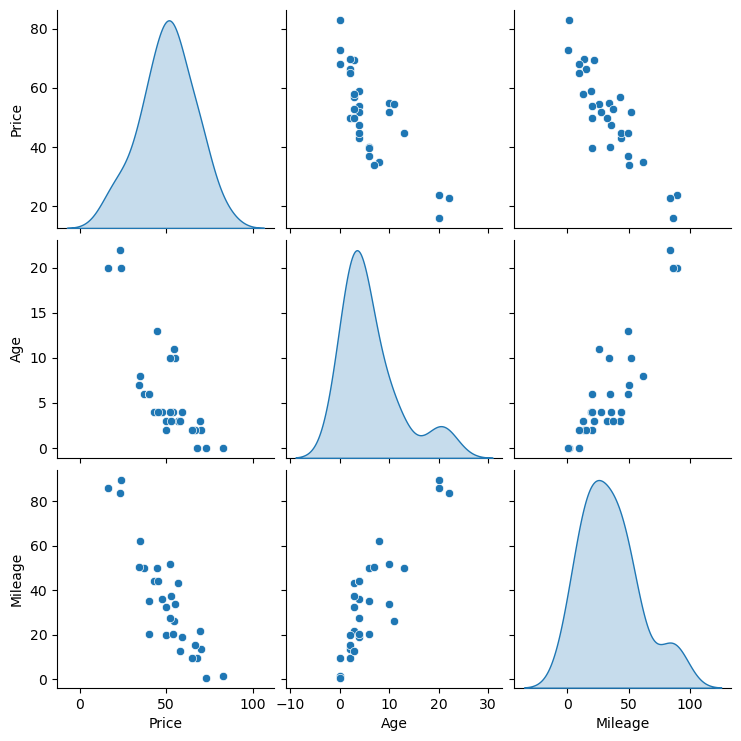

In [81]:
sns.pairplot(data=porsche, y_vars=['Price', 'Age', 'Mileage'], x_vars=['Price', 'Age', 'Mileage'], diag_kind='kde')

In [82]:
jag_price_mil_result = smf.ols('Price ~ Mileage', data=jaguar).fit()
jag_price_age_result = smf.ols('Price ~ Age', data=jaguar).fit()

jag_price_mil_result.params


Intercept    54.227464
Mileage      -0.620299
dtype: float64

In [83]:
jag_price_age_result.params

Intercept    56.988403
Age          -5.039947
dtype: float64

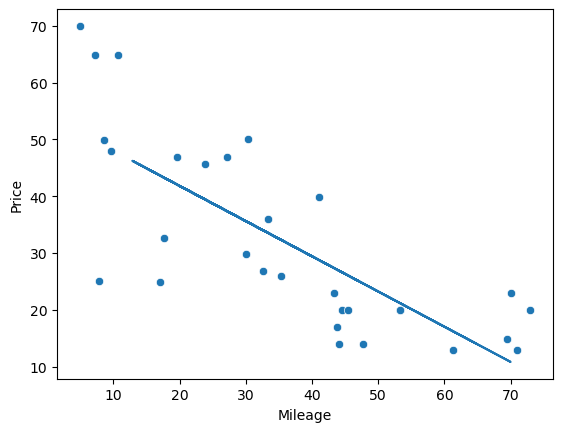

In [84]:
jaguar['mil_line'] = jaguar['Price'] * jag_price_mil_result.params[1] + jag_price_mil_result.params[0]
ax = sns.scatterplot(x='Mileage', y='Price', data=jaguar)
ax.plot('Price', 'mil_line', data=jaguar ) 

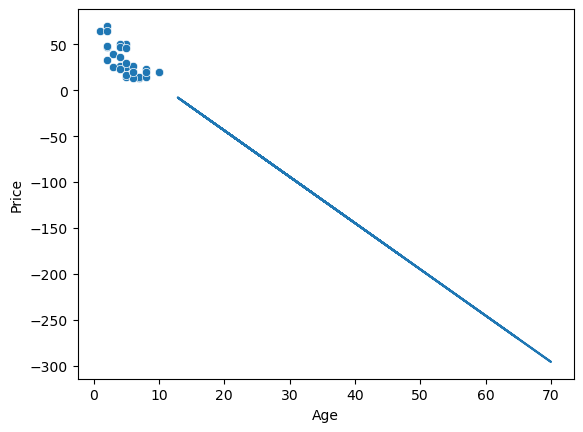

In [85]:
jaguar['age_line'] = jaguar['Price'] * jag_price_age_result.params[1] + jag_price_age_result.params[0]
ax = sns.scatterplot(x='Age', y='Price', data=jaguar)
ax.plot('Price', 'age_line', data=jaguar )

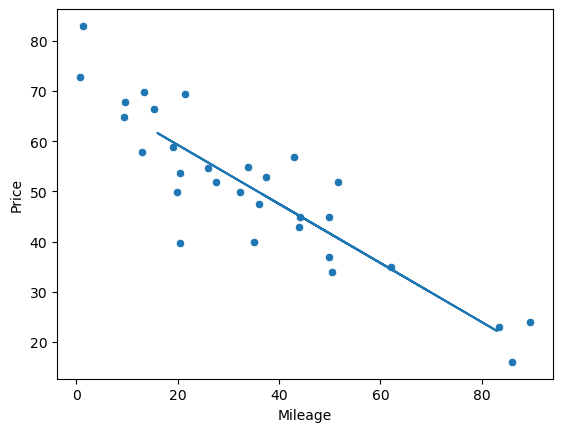

In [86]:
por_price_age_result = smf.ols('Price ~ Age', data=porsche).fit()
por_price_mil_result = smf.ols('Price ~ Mileage', data=porsche).fit()

porsche['mil_line'] = porsche['Price'] * por_price_mil_result.params[1] + por_price_mil_result.params[0]
ax = sns.scatterplot(x='Mileage', y='Price', data=porsche)
ax.plot('Price', 'mil_line', data=porsche )

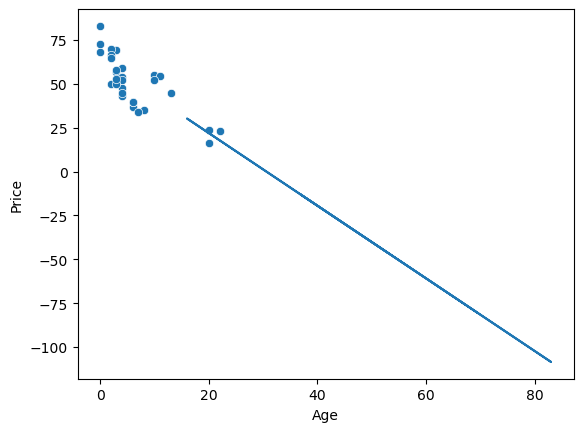

In [87]:
porsche['age_line'] = porsche['Price'] * por_price_age_result.params[1] + por_price_age_result.params[0]
ax = sns.scatterplot(x='Age', y='Price', data=porsche)
ax.plot('Price', 'age_line', data=porsche )